<a href="https://colab.research.google.com/github/BlazingBurn/HitemapythonExo/blob/main/analyse%20donnee/ProjetAnalyseDonneeEchecs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHESS / ECHECS

### **PROBLEMATIQUE : Est-ce qu'un opening particulier influt sur la victoire ?**

<br/>

#### * **Opening** ou **Ouverture** correspond a la première phase d'une partie d'échecs. Elle s'arrête lorsque les forces des deux adversaires sont mobilisées et que les rois sont en sécurité. 

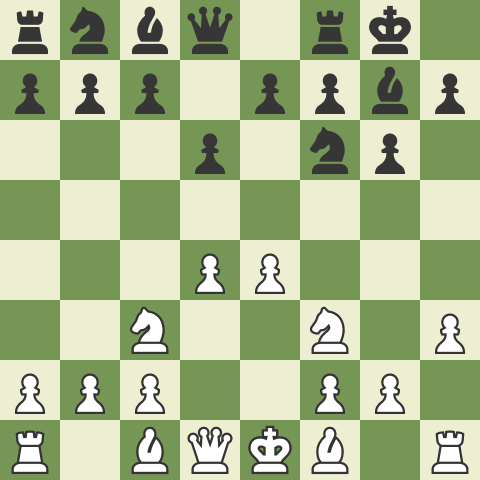

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
dataChess=pd.read_csv('gdrive/My Drive/Hitema/Python/Anal donnees/games.csv')

### **Transformation "Unix" du dataSet à des valeurs "dateTime" :**



In [4]:
dataChessTimes = dataChess[['created_at','last_move_at']].copy()

dataChessTimes['created_at_dt'] = pd.to_datetime(dataChessTimes['created_at']/1000, 
                                           unit='s', 
                                           origin='unix')

dataChessTimes['last_move_at_dt'] = pd.to_datetime(dataChessTimes['last_move_at']/1000, 
                                             unit='s', 
                                             origin='unix')

dataChess['created_at'] = dataChessTimes['created_at_dt']
dataChess['last_move_at'] = dataChessTimes['last_move_at_dt']

### **Ajout du format de la partie jouer :**

In [5]:
def GameType(inc):
    splitted = inc.split('+')
    if int(splitted[0])+int(splitted[1]) <= 9:
        return 'blitz'
    elif int(splitted[0])+int(splitted[1]) <= 16:
        return 'rapide'
    else:
        return 'tournoi'

dataChess['format'] = np.vectorize(GameType)(dataChess['increment_code'])

In [6]:
dataChess

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,format
0,TZJHLljE,False,2017-08-31 20:06:40.000000000,2017-08-31 20:06:40.000000000,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,tournoi
1,l1NXvwaE,True,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,rapide
2,mIICvQHh,True,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,rapide
3,kWKvrqYL,True,2017-08-30 16:20:00.000000000,2017-08-30 16:20:00.000000000,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,tournoi
4,9tXo1AUZ,True,2017-08-29 18:06:40.000000000,2017-08-29 18:06:40.000000000,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,tournoi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,2017-07-11 16:35:14.342000128,2017-07-11 16:40:36.076000000,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,tournoi
20054,WSJDhbPl,True,2017-07-10 14:48:09.760000000,2017-07-10 15:00:33.979000064,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,rapide
20055,yrAas0Kj,True,2017-07-10 14:44:37.492999936,2017-07-10 14:47:30.326999808,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,rapide
20056,b0v4tRyF,True,2017-07-10 14:15:27.019000064,2017-07-10 14:31:13.717999872,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,rapide


# **I. Est-ce que commencer en premier donne un avantage ?**

#### **Seulement les parties classées :**

In [28]:
dataChessUtils = dataChess[(dataChess['rated'] == True)]

print("Nouveau nombre de parties :",dataChessUtils.shape[0])

dataChessUtils.head(5)

Nouveau nombre de parties : 16155


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,format
1,l1NXvwaE,True,2017-08-30 21:53:20,2017-08-30 21:53:20,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,rapide
2,mIICvQHh,True,2017-08-30 21:53:20,2017-08-30 21:53:20,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,rapide
3,kWKvrqYL,True,2017-08-30 16:20:00,2017-08-30 16:20:00,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,tournoi
4,9tXo1AUZ,True,2017-08-29 18:06:40,2017-08-29 18:06:40,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,tournoi
6,qwU9rasv,True,2017-09-01 01:40:00,2017-09-01 01:40:00,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10,rapide


#### **Supression des colonnes inutile :**



In [29]:
dataChessUtils = dataChessUtils.drop(columns=['id', 'created_at', 'last_move_at', 'black_id', 'white_id', 'rated', 'opening_ply'])

dataChessUtils

,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,format
1,16,resign,black,5+10,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,rapide
2,61,mate,white,5+10,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,rapide
3,61,mate,white,20+0,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,tournoi
4,95,mate,white,30+3,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,tournoi
6,33,resign,white,10+0,1520,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,rapide
...,...,...,...,...,...,...,...,...,...,...
20053,24,resign,white,10+10,1691,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,tournoi
20054,82,mate,black,10+0,1233,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,rapide
20055,35,mate,white,10+0,1219,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,rapide
20056,109,resign,white,10+0,1360,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,rapide


### **Vérification si il n'y a pas de valeur absurde dans les résultats des matchs (trop grosse différence entre le classement des deux joueurs)**

[Text(0.5, 1.0, 'Graphique montrant la différence de niveau dans les parties classées')]

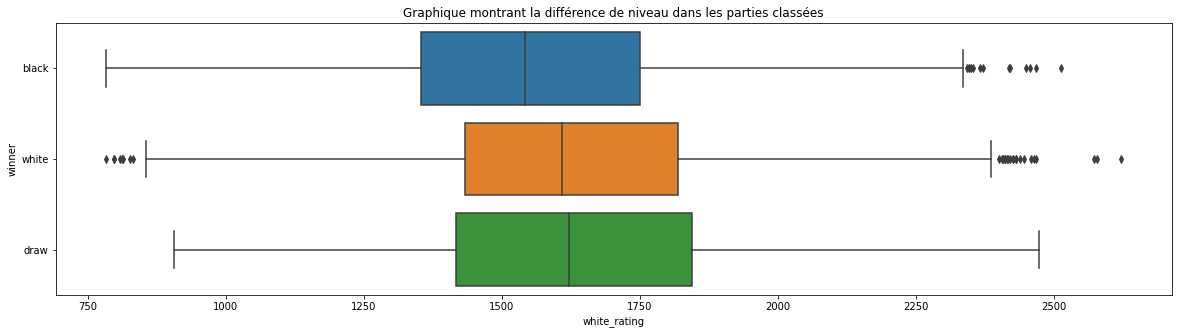

In [30]:
f, ax = plt.subplots(figsize=(20,5))
sns.boxplot(data=dataChessUtils,x="white_rating", y="winner", ax=ax).set(title="Graphique montrant la différence de niveau dans les parties classées")

[Text(0.5, 1.0, 'Graphique montrant la différence de niveau dans les parties classées')]

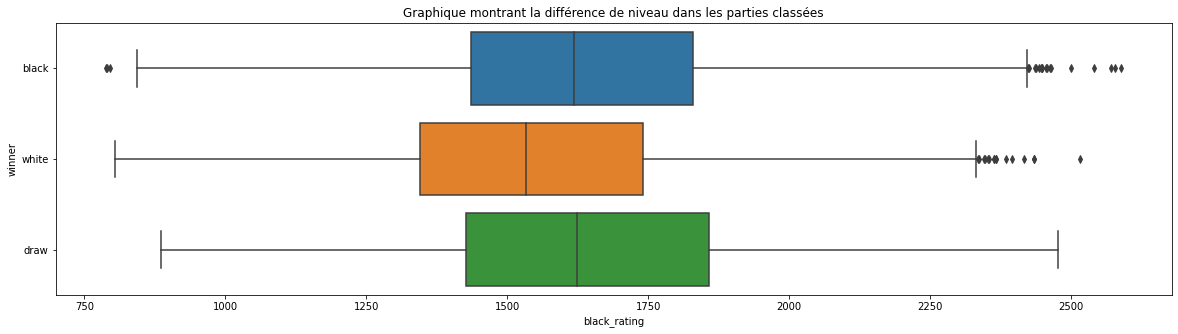

In [31]:
f, ax = plt.subplots(figsize=(20,5))
sns.boxplot(data=dataChessUtils,x="black_rating", y="winner", ax=ax).set(title="Graphique montrant la différence de niveau dans les parties classées")

In [32]:
dataChessUtils.describe()

,turns,white_rating,black_rating
count,16155.000000,16155.000000,16155.000000
mean,61.962550,1597.102012,1593.503188
std,33.732775,284.178397,289.627160
min,1.000000,784.000000,789.000000
25%,39.000000,1396.000000,1390.000000
50%,57.000000,1577.000000,1573.000000
75%,80.000000,1794.000000,1791.000000
max,349.000000,2622.000000,2588.000000


In [33]:
# Isolation des valeurs aberrantes
Q1 = dataChessUtils['white_rating'].quantile(0.25)
Q3 = dataChessUtils['white_rating'].quantile(0.75)

IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (dataChessUtils['white_rating'] >= Q1 - (1.5 * IQR)) & (dataChessUtils['white_rating'] <= Q3 + (1.5 * IQR))
dataChessUtils = dataChessUtils.loc[filter]

In [34]:
# Isolation des valeurs aberrantes
Q1 = dataChessUtils['black_rating'].quantile(0.25)
Q3 = dataChessUtils['black_rating'].quantile(0.75)

IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (dataChessUtils['black_rating'] >= Q1 - (1.5 * IQR)) & (dataChessUtils['black_rating'] <= Q3 + (1.5 * IQR))
dataChessUtils = dataChessUtils.loc[filter]

In [36]:
dataChessUtils.describe()

,turns,white_rating,black_rating
count,16076.000000,16076.000000,16076.000000
mean,61.930766,1594.415588,1590.488617
std,33.698999,280.422870,285.490589
min,1.000000,801.000000,796.000000
25%,39.000000,1395.000000,1389.000000
50%,57.000000,1575.000000,1572.000000
75%,80.000000,1790.000000,1786.000000
max,349.000000,2386.000000,2386.000000


### **Les blancs avantagés ?**
#### **Histogrammes par rapport au chance de gagner en étant noir ou blanc :**

[Text(0.5, 1.0, 'Histogramme de victoire des joueurs blanc par rapport au classement')]

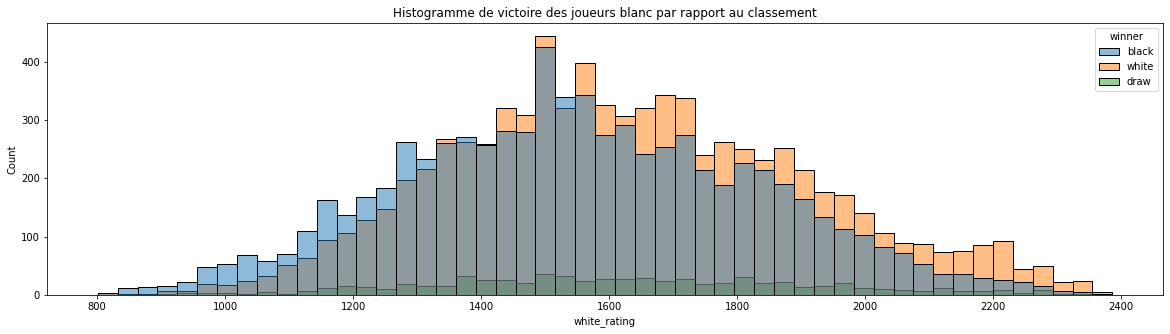

In [13]:
# Creation visuel pour la victoire des blancs en fonction de leur rang
f, ax = plt.subplots(figsize=(20,5))
sns.histplot(data=dataChessUtils, x='white_rating', hue='winner', ax=ax).set(title='Histogramme de victoire des joueurs blanc par rapport au classement')

[Text(0.5, 1.0, 'Histogramme de victoire des joueurs noir par rapport au classement')]

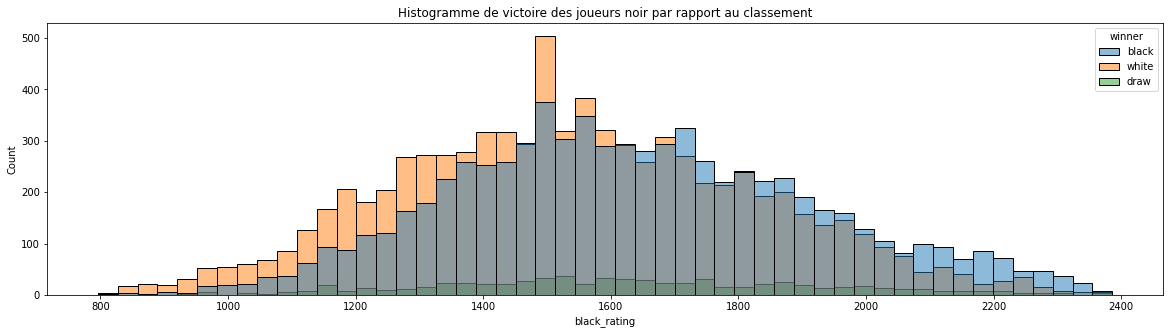

In [14]:
# Creation visuel pour la victoire des noirs en fonction de leur rang
f, ax = plt.subplots(figsize=(20,5))
sns.histplot(data=dataChessUtils, x='black_rating', hue='winner', ax=ax).set(title='Histogramme de victoire des joueurs noir par rapport au classement')

### **Vérification du type de victoire**

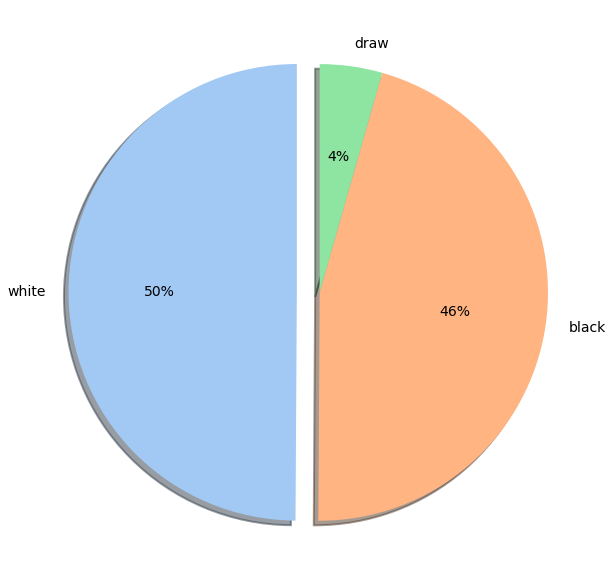

In [15]:
# exploding pie
explode = [0.1, 0, 0]
# Seaborn color
colors = sns.color_palette('pastel')[0:5]

data = dataChessUtils['winner'].value_counts()
keys = dataChessUtils['winner'].value_counts().index.tolist()

# chart
plt.pie(data, labels=keys, colors=colors, 
        explode=explode, autopct='%.0f%%',
        shadow = 'True', textprops = {'color': 'Black','fontsize':14}, 
        wedgeprops = {'linewidth': 2}, startangle = 90)
  
# displaying chart
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

# **II. Existe-t-il un opening plus fort que les autres ?**

### **Meilleurs opening :**

[Text(0.5, 1.0, 'Cinq meilleurs opening')]

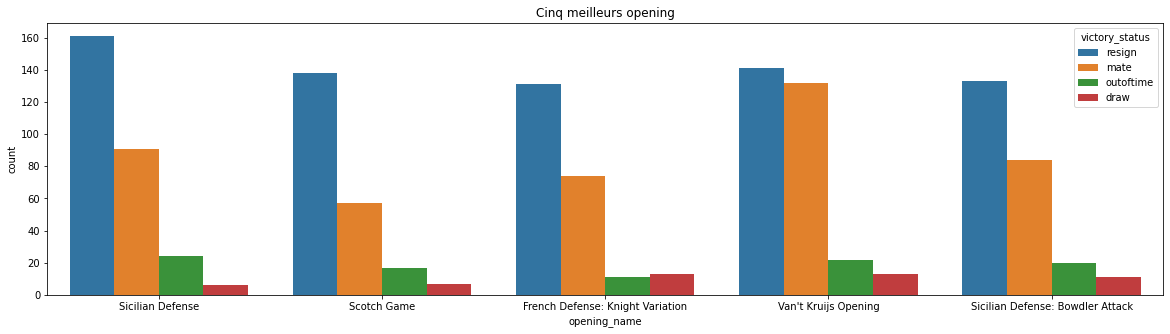

In [16]:
dataChessWhiteWin = dataChessUtils[(dataChessUtils['victory_status'] != 'draw')]
temp_dict = dict(dataChessWhiteWin['opening_name'].value_counts()[0:5])
top_opening_white = list(temp_dict.keys())
temp_df = dataChessUtils[dataChessUtils['opening_name'].isin(top_opening_white)]

f, ax = plt.subplots(figsize=(20,5))
sns.countplot(data=temp_df, x='opening_name', hue='victory_status', ax=ax).set(title='Cinq meilleurs opening')

[Text(0.5, 1.0, 'Comparaison des cinqs meilleurs opening en fonction du vainqueur du match')]

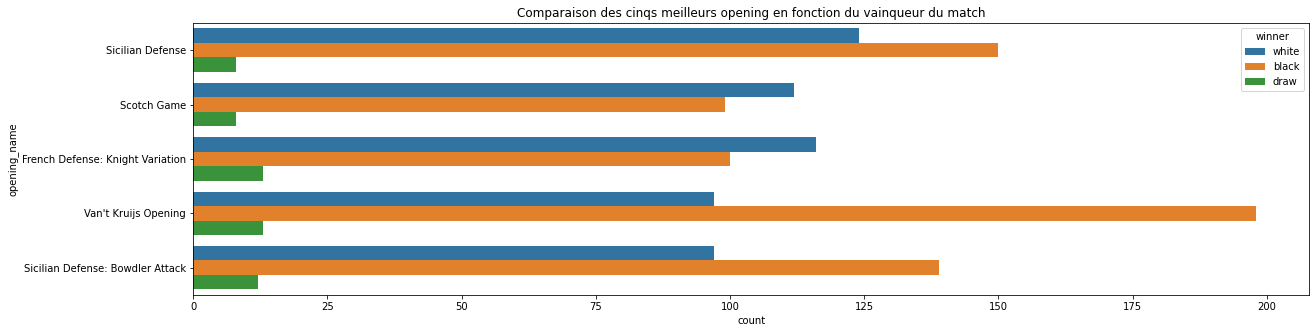

In [17]:
dataChessOpeningCompare = dataChessUtils[(dataChessUtils['opening_name'].isin(top_opening_white))]
f, ax = plt.subplots(figsize=(20,5))
sns.countplot(data=dataChessOpeningCompare, y='opening_name', hue='winner', ax=ax).set(title='Comparaison des cinqs meilleurs opening en fonction du vainqueur du match')

### **Opening en fonction du type de partie (blitz, rapide, tournoi)**

[Text(0.5, 1.0, "Choix de l'opening en fonction du format de la partie")]

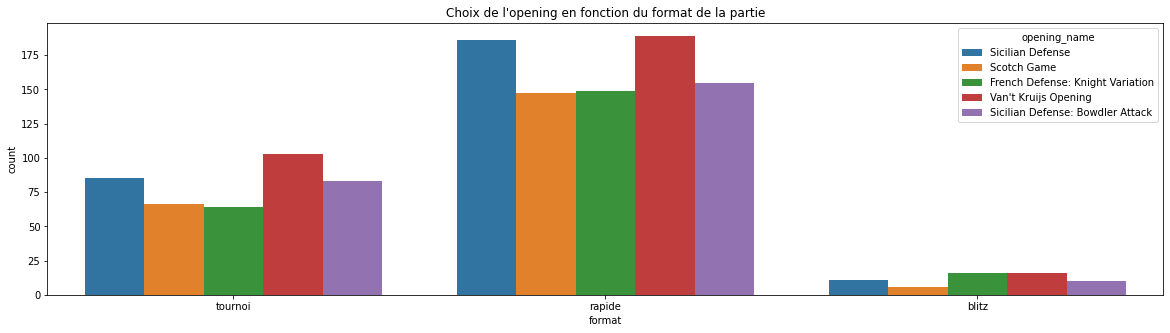

In [18]:
f, ax = plt.subplots(figsize=(20,5))
sns.countplot(data=dataChessOpeningCompare, x='format', hue='opening_name', ax=ax).set(title="Choix de l'opening en fonction du format de la partie")

# **Conclusion**

### Il existe bien des openings pour augmenter ces chances de gagner mais on rappel que les echecs ce base aussi sur l'adaptabilité et que généralement l'opening influt seulement sur le début et milieu de partie et que pour la fin cela nécessite de prédire les mouvements de son adversaire pour retourner la situation ou maintenir la présion mentale mise sur l'adversaire.